In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Importing the games data from season 2003 to 2021

Games = pd.read_csv('games.csv')
print(Games.columns)
Games.head()

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [3]:
# Check whether there is missing values or not

Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
GAME_DATE_EST       25796 non-null object
GAME_ID             25796 non-null int64
GAME_STATUS_TEXT    25796 non-null object
HOME_TEAM_ID        25796 non-null int64
VISITOR_TEAM_ID     25796 non-null int64
SEASON              25796 non-null int64
TEAM_ID_home        25796 non-null int64
PTS_home            25697 non-null float64
FG_PCT_home         25697 non-null float64
FT_PCT_home         25697 non-null float64
FG3_PCT_home        25697 non-null float64
AST_home            25697 non-null float64
REB_home            25697 non-null float64
TEAM_ID_away        25796 non-null int64
PTS_away            25697 non-null float64
FG_PCT_away         25697 non-null float64
FT_PCT_away         25697 non-null float64
FG3_PCT_away        25697 non-null float64
AST_away            25697 non-null float64
REB_away            25697 non-null float64
HOME_TEAM_WINS      25796 non-null int64
dtyp

In [4]:
# Check whether there is a non-finalized match 

print(Games.GAME_STATUS_TEXT.unique())

# Check whether there is duplicate Games in the dataframe

print(Games.GAME_ID.value_counts())

# Dropping duplicate games from the datafrane

Games.drop_duplicates(subset=['GAME_ID'],inplace = True)

['Final']
22000006    2
22000077    2
22000070    2
22000076    2
22000067    2
           ..
10300080    1
22100658    1
41600234    1
20800185    1
21700612    1
Name: GAME_ID, Length: 25767, dtype: int64


In [5]:
Games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [6]:
# Dropping unnecessary columns

Games.drop(['GAME_DATE_EST','GAME_STATUS_TEXT','TEAM_ID_home','TEAM_ID_away'],axis = 1, inplace = True)

In [7]:
# Importing the games data from season 2003 to 2021

Games_Details = pd.read_csv('games_details.csv')
Games_Details.head()

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [8]:
# Importing the teams data

Teams = pd.read_csv('teams.csv')
Teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [9]:
Games

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22101005,1610612748,1610612750,2021,104.0,0.398,0.760,0.333,23.0,53.0,113.0,0.422,0.875,0.357,21.0,46.0,0
1,22101006,1610612741,1610612739,2021,101.0,0.443,0.933,0.429,20.0,46.0,91.0,0.419,0.824,0.208,19.0,40.0,1
2,22101007,1610612759,1610612754,2021,108.0,0.412,0.813,0.324,28.0,52.0,119.0,0.489,1.000,0.389,23.0,47.0,0
3,22101008,1610612744,1610612749,2021,122.0,0.484,0.933,0.400,33.0,55.0,109.0,0.413,0.696,0.386,27.0,39.0,1
4,22101009,1610612743,1610612761,2021,115.0,0.551,0.750,0.407,32.0,39.0,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,11400007,1610612737,1610612740,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,11400004,1610612741,1610612764,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,11400005,1610612747,1610612743,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,11400002,1610612761,1610612758,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [10]:
# Keeping necessary columns in the Teams dataframe

Teams = Teams[['TEAM_ID', 'NICKNAME','CITY']]

In [11]:
# Filtering home teams 

Games_Home = Games.copy()
Games_Home.drop(['GAME_ID','VISITOR_TEAM_ID','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away'],axis=1,inplace = True)
Games_Home.rename(columns={"HOME_TEAM_ID": "TEAM_ID", "PTS_home" :"PTS_for","PTS_away" :"PTS_against"}, inplace = True)
Games_Home["win"] = np.where(Games_Home.HOME_TEAM_WINS == 1,1,0)

In [12]:
Games_Home

,TEAM_ID,SEASON,PTS_for,PTS_against,HOME_TEAM_WINS,win
0,1610612748,2021,104.0,113.0,0,0
1,1610612741,2021,101.0,91.0,1,1
2,1610612759,2021,108.0,119.0,0,0
3,1610612744,2021,122.0,109.0,1,1
4,1610612743,2021,115.0,127.0,0,0
...,...,...,...,...,...,...
25791,1610612737,2014,93.0,87.0,1,1
25792,1610612741,2014,81.0,85.0,0,0
25793,1610612747,2014,98.0,95.0,1,1
25794,1610612761,2014,99.0,94.0,1,1


In [13]:
# Filtering away teams 

Games_Away = Games.copy()
Games_Away.drop(['GAME_ID','HOME_TEAM_ID','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away'],axis=1,inplace = True)
Games_Away.rename(columns={"VISITOR_TEAM_ID": "TEAM_ID", "PTS_home" :"PTS_against","PTS_away" :"PTS_for"}, inplace = True)
Games_Away["win"] = np.where(Games_Away.HOME_TEAM_WINS == 0,1,0)

In [14]:
Games_Away

,TEAM_ID,SEASON,PTS_against,PTS_for,HOME_TEAM_WINS,win
0,1610612750,2021,104.0,113.0,0,1
1,1610612739,2021,101.0,91.0,1,0
2,1610612754,2021,108.0,119.0,0,1
3,1610612749,2021,122.0,109.0,1,0
4,1610612761,2021,115.0,127.0,0,1
...,...,...,...,...,...,...
25791,1610612740,2014,93.0,87.0,1,0
25792,1610612764,2014,81.0,85.0,0,1
25793,1610612743,2014,98.0,95.0,1,0
25794,1610612758,2014,99.0,94.0,1,0


In [15]:
# Appending games for both away and home teams

Games_Home = Games_Home.append(Games_Away, ignore_index=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [16]:
# Dropping unnecesaary column
Games_Home.drop('HOME_TEAM_WINS',axis = 1, inplace = True)

In [17]:
Games_Home

,PTS_against,PTS_for,SEASON,TEAM_ID,win
0,113.0,104.0,2021,1610612748,0
1,91.0,101.0,2021,1610612741,1
2,119.0,108.0,2021,1610612759,0
3,109.0,122.0,2021,1610612744,1
4,127.0,115.0,2021,1610612743,0
...,...,...,...,...,...
51529,93.0,87.0,2014,1610612740,0
51530,81.0,85.0,2014,1610612764,1
51531,98.0,95.0,2014,1610612743,0
51532,99.0,94.0,2014,1610612758,0


In [18]:
#Generate a team level dataframe that aggregates the total number of "win", 
#the total number of “PTS_for” and “PTS_against” for each team in each season (i.e. grouped by Team ID and Season

NBA_Team_Stats = Games_Home.groupby(['TEAM_ID','SEASON'])['win','PTS_for','PTS_against'].sum().reset_index()

In [19]:
# Create a dataframe that include the total number of games played by each team in each season 

Games_Home["game_count"] = 1
Games_Home_Count = Games_Home.groupby(['TEAM_ID','SEASON'])['game_count'].sum().reset_index()

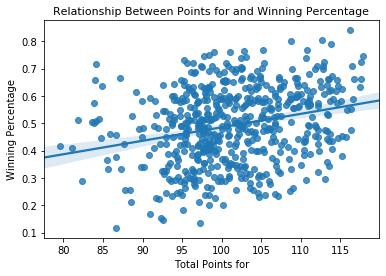

In [20]:
# Merge the “Games_Home_Count” dataframe into the “NBA_Team_Stats” dataframe by Team ID and Season
# Calculation win percentage, avg points for and against per game

NBA_Team_Stats = pd.merge(NBA_Team_Stats,Games_Home_Count,on = ['TEAM_ID','SEASON'])
NBA_Team_Stats ["win_pct"] =  NBA_Team_Stats["win"] / NBA_Team_Stats["game_count"]
NBA_Team_Stats ["avg_ptsf"] =  NBA_Team_Stats["PTS_for"] / NBA_Team_Stats["game_count"]
NBA_Team_Stats ["avg_ptsa"] =  NBA_Team_Stats["PTS_against"] / NBA_Team_Stats["game_count"]

# Plotting Relationship Between Points for and Winning Percentage

sns.regplot(x= NBA_Team_Stats.avg_ptsf, y = NBA_Team_Stats.win_pct, data = NBA_Team_Stats)
plt.title("Relationship Between Points for and Winning Percentage",fontsize=11)
plt.xlabel("Total Points for")
plt.ylabel("Winning Percentage")
plt.show()

In [21]:
NBA_Team_Stats.describe()

,TEAM_ID,SEASON,win,PTS_for,PTS_against,game_count,win_pct,avg_ptsf,avg_ptsa
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1.610613e+09,2012.015817,45.284710,9174.673111,9174.673111,90.569420,0.492035,101.421044,101.654366
std,8.649257e+00,5.473827,16.054259,1135.752075,942.187245,9.987801,0.139052,7.335359,7.393580
min,1.610613e+09,2003.000000,8.000000,5893.000000,6334.000000,68.000000,0.117647,79.573034,77.710000
25%,1.610613e+09,2007.000000,34.000000,8460.000000,8691.000000,87.000000,0.393258,96.542056,96.931818
50%,1.610613e+09,2012.000000,44.000000,9100.000000,9245.000000,90.000000,0.494845,100.775281,101.280899
75%,1.610613e+09,2017.000000,56.000000,9832.000000,9685.000000,96.000000,0.593750,106.527473,106.727273
max,1.610613e+09,2021.000000,91.000000,12729.000000,12124.000000,115.000000,0.839623,117.879121,119.183908


In [22]:
# Correlation between PTS for and Win PCT
NBA_Team_Stats.PTS_for.corr(NBA_Team_Stats.win_pct)

0.6160877031355704

In [23]:
# Correlation between Average PTS for and Win PCT
NBA_Team_Stats.avg_ptsf.corr(NBA_Team_Stats.win_pct)

0.2597347604730699

In [24]:
# Correlation between Average PTS against and Win PCT
NBA_Team_Stats.avg_ptsa.corr(NBA_Team_Stats.win_pct)

-0.30240016048923574

Text(29.796881510416675, 0.5, 'Winning Percentage')

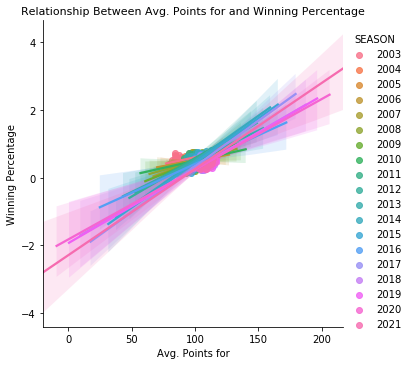

In [25]:
# # Plotting Relationship Between Avg. Points for and Winning Percentage for each Season
sns.lmplot(x= "avg_ptsf", y = "win_pct", hue = "SEASON" , data = NBA_Team_Stats)
plt.title("Relationship Between Avg. Points for and Winning Percentage",fontsize=11)
plt.xlabel("Avg. Points for")
plt.ylabel("Winning Percentage")

In [26]:
NBA_Team_Stats

,TEAM_ID,SEASON,win,PTS_for,PTS_against,game_count,win_pct,avg_ptsf,avg_ptsa
0,1610612737,2003,33,7691.0,8075.0,90,0.366667,85.455556,89.722222
1,1610612737,2004,13,7759.0,8614.0,84,0.154762,92.369048,102.547619
2,1610612737,2005,29,8646.0,9038.0,89,0.325843,97.146067,101.550562
3,1610612737,2006,35,8460.0,8846.0,90,0.388889,94.000000,98.288889
4,1610612737,2007,47,9479.0,9668.0,97,0.484536,97.721649,99.670103
...,...,...,...,...,...,...,...,...,...
564,1610612766,2017,38,9382.0,9364.0,87,0.436782,107.839080,107.632184
565,1610612766,2018,43,9652.0,9718.0,87,0.494253,110.942529,111.701149
566,1610612766,2019,24,7204.0,7656.0,70,0.342857,102.914286,109.371429
567,1610612766,2020,34,8447.0,8622.0,77,0.441558,109.701299,111.974026


In [27]:
# Importing the players data

Players = pd.read_csv('players.csv')
Players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


# EVOLUTION OF 3 POINTS SHOTS

In [28]:
Games_Details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [29]:
# Check whether there is missing data

Games_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
GAME_ID              645953 non-null int64
TEAM_ID              645953 non-null int64
TEAM_ABBREVIATION    645953 non-null object
TEAM_CITY            645953 non-null object
PLAYER_ID            645953 non-null int64
PLAYER_NAME          645953 non-null object
NICKNAME             30362 non-null object
START_POSITION       247215 non-null object
COMMENT              105602 non-null object
MIN                  540350 non-null object
FGM                  540350 non-null float64
FGA                  540350 non-null float64
FG_PCT               540350 non-null float64
FG3M                 540350 non-null float64
FG3A                 540350 non-null float64
FG3_PCT              540350 non-null float64
FTM                  540350 non-null float64
FTA                  540350 non-null float64
FT_PCT               540350 non-null float64
OREB                 540350 non-null float64
DRE

In [30]:
# Drop the players didn't play

Games_Details.dropna(subset=['MIN'],inplace = True)

In [31]:
# Dropping duplicate games from the datafrane

Games_Details.drop_duplicates(subset=['GAME_ID','TEAM_ID','PLAYER_ID'],inplace = True)

In [32]:
# Check missing values

Games_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540082 entries, 0 to 645952
Data columns (total 29 columns):
GAME_ID              540082 non-null int64
TEAM_ID              540082 non-null int64
TEAM_ABBREVIATION    540082 non-null object
TEAM_CITY            540082 non-null object
PLAYER_ID            540082 non-null int64
PLAYER_NAME          540082 non-null object
NICKNAME             24808 non-null object
START_POSITION       247094 non-null object
COMMENT              0 non-null object
MIN                  540082 non-null object
FGM                  540082 non-null float64
FGA                  540082 non-null float64
FG_PCT               540082 non-null float64
FG3M                 540082 non-null float64
FG3A                 540082 non-null float64
FG3_PCT              540082 non-null float64
FTM                  540082 non-null float64
FTA                  540082 non-null float64
FT_PCT               540082 non-null float64
OREB                 540082 non-null float64
DREB    

In [33]:
# Calculating the number of field goal made in each game
Number_of_Games = Games_Details.groupby(['GAME_ID'])['FGM'].count().reset_index()
Number_of_Games

,GAME_ID,FGM
0,10300001,30
1,10300002,28
2,10300003,28
3,10300004,26
4,10300005,25
...,...,...
25663,52000111,27
25664,52000121,18
25665,52000131,20
25666,52000201,26


In [34]:
# Total Stats for each Team in each Game

Games_Summary = Games_Details.groupby(['GAME_ID','TEAM_ID'])['FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS'].sum().reset_index()
Games_Summary

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,52000131,1610612763,40.0,90.0,7.0,22.0,13.0,24.0,11.0,45.0,56.0,18.0,4.0,11.0,9.0,19.0,100.0
51333,52000201,1610612754,41.0,100.0,15.0,41.0,18.0,21.0,9.0,31.0,40.0,30.0,9.0,4.0,14.0,19.0,115.0
51334,52000201,1610612764,54.0,93.0,14.0,28.0,20.0,26.0,7.0,45.0,52.0,34.0,7.0,9.0,15.0,20.0,142.0
51335,52000211,1610612744,42.0,94.0,12.0,34.0,16.0,20.0,11.0,37.0,48.0,30.0,7.0,7.0,21.0,23.0,112.0


In [35]:
# Obtaining the season of the games

Games_with_Season = Games.copy()
Games_with_Season = Games_with_Season[['GAME_ID', 'SEASON']]
Games_with_Season

,GAME_ID,SEASON
0,22101005,2021
1,22101006,2021
2,22101007,2021
3,22101008,2021
4,22101009,2021
...,...,...
25791,11400007,2014
25792,11400004,2014
25793,11400005,2014
25794,11400002,2014


In [36]:
# Game statistics for different seasons

Season_Summary = pd.merge(Games_Summary,Games_with_Season,on = ['GAME_ID'])
Season_Summary

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,SEASON
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0,2003
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0,2003
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0,2003
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0,2003
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,52000131,1610612763,40.0,90.0,7.0,22.0,13.0,24.0,11.0,45.0,56.0,18.0,4.0,11.0,9.0,19.0,100.0,2020
51333,52000201,1610612754,41.0,100.0,15.0,41.0,18.0,21.0,9.0,31.0,40.0,30.0,9.0,4.0,14.0,19.0,115.0,2020
51334,52000201,1610612764,54.0,93.0,14.0,28.0,20.0,26.0,7.0,45.0,52.0,34.0,7.0,9.0,15.0,20.0,142.0,2020
51335,52000211,1610612744,42.0,94.0,12.0,34.0,16.0,20.0,11.0,37.0,48.0,30.0,7.0,7.0,21.0,23.0,112.0,2020


In [37]:
# Count number of games for each season
Game_Count = Season_Summary.groupby(['SEASON'])['GAME_ID'].count().reset_index()
Game_Count

,SEASON,GAME_ID
0,2003,2572
1,2004,2724
2,2005,2865
3,2006,2838
4,2007,2822
5,2008,2850
6,2009,2848
7,2010,2844
8,2011,2208
9,2012,2840


In [38]:
# Team stats for each season

Team_Summary = Season_Summary.groupby(['SEASON','TEAM_ID'])['FGM','FGA','FG3M','FG3A','FTM','FTA','PTS'].sum().reset_index()
Team_Summary = pd.merge(Team_Summary,Teams,on = ['TEAM_ID'])
Team_Summary

,SEASON,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,PTS,NICKNAME,CITY
0,2003,1610612737,2857.0,6609.0,422.0,1256.0,1555.0,2004.0,7691.0,Hawks,Atlanta
1,2004,1610612737,2997.0,6821.0,309.0,997.0,1456.0,2059.0,7759.0,Hawks,Atlanta
2,2005,1610612737,3196.0,6997.0,450.0,1205.0,1804.0,2404.0,8646.0,Hawks,Atlanta
3,2006,1610612737,3105.0,6986.0,385.0,1161.0,1865.0,2438.0,8460.0,Hawks,Atlanta
4,2007,1610612737,3457.0,7668.0,436.0,1250.0,2129.0,2758.0,9479.0,Hawks,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
564,2017,1610612766,3386.0,7537.0,872.0,2379.0,1738.0,2334.0,9382.0,Hornets,Charlotte
565,2018,1610612766,3495.0,7788.0,1043.0,2949.0,1619.0,2046.0,9652.0,Hornets,Charlotte
566,2019,1610612766,2615.0,6015.0,839.0,2397.0,1135.0,1506.0,7204.0,Hornets,Charlotte
567,2020,1610612766,3075.0,6771.0,1055.0,2853.0,1242.0,1635.0,8447.0,Hornets,Charlotte


In [39]:
Team_Summary =Team_Summary.sort_values(['SEASON','FG3M'], ascending = False)

In [40]:
# Obtaining the highest 3 points made for each season

Team_Summary = Team_Summary.groupby(['SEASON'])['FG3M'].max().reset_index()
Team_Summary.drop([18],axis = 0, inplace = True)
Team_Summary['SEASON'] = Team_Summary.SEASON.astype(str)
Team_Summary

,SEASON,FG3M
0,2003,727.0
1,2004,945.0
2,2005,1106.0
3,2006,911.0
4,2007,939.0
5,2008,1065.0
6,2009,1066.0
7,2010,878.0
8,2011,731.0
9,2012,1044.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

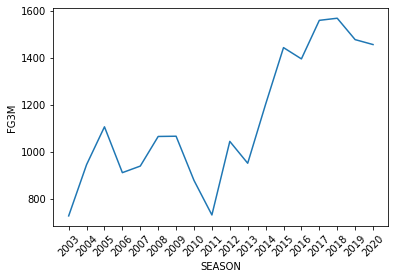

In [41]:
# Plot of Number of 3 Points Made in Each Season
sns.lineplot(data=Team_Summary, x="SEASON", y="FG3M")
plt.xticks(rotation=45)

In [42]:
# Avg of 3 Made Attempts and Made per Game by Season

Field_Goals_per_Game = Season_Summary.groupby(['SEASON'])['FGM','FGA','FG3M','FG3A','FTM','FTA','PTS'].mean().reset_index()
Field_Goals_per_Game['SEASON'] = Field_Goals_per_Game.SEASON.astype(str)

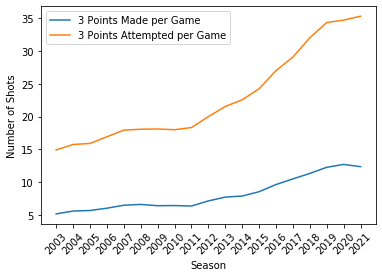

In [43]:
# Plot of 3 Points Attempted and Made per Game For Each Season

plt.plot(Field_Goals_per_Game.SEASON, Field_Goals_per_Game.FG3M, label = "3 Points Made per Game")
plt.plot(Field_Goals_per_Game.SEASON, Field_Goals_per_Game.FG3A, label = "3 Points Attempted per Game")
plt.xlabel("Season")
plt.ylabel("Number of Shots")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [44]:
# Computing the stats for each season

Field_Goals_per_Season = Season_Summary.groupby(['SEASON'])['FGM','FGA','FG3M','FG3A','FTM','FTA','PTS'].sum().reset_index()
Field_Goals_per_Season['SEASON'] = Field_Goals_per_Season.SEASON.astype(str)
Field_Goals_per_Season

,SEASON,FGM,FGA,FG3M,FG3A,FTM,FTA,PTS
0,2003,89488.0,204541.0,13245.0,38349.0,46845.0,62546.0,239066.0
1,2004,97439.0,217924.0,15219.0,42879.0,53941.0,71495.0,264030.0
2,2005,102016.0,225218.0,16241.0,45568.0,56929.0,76488.0,277205.0
3,2006,102854.0,225184.0,17082.0,48015.0,56451.0,75260.0,279241.0
4,2007,104176.0,228901.0,18263.0,50614.0,53920.0,71551.0,280535.0
5,2008,104791.0,229367.0,18797.0,51500.0,54948.0,71706.0,283327.0
6,2009,106379.0,231322.0,18230.0,51580.0,54382.0,71852.0,285370.0
7,2010,104773.0,229730.0,18264.0,51186.0,53947.0,70762.0,281757.0
8,2011,80007.0,179130.0,14028.0,40464.0,37729.0,50202.0,211771.0
9,2012,104670.0,232192.0,20251.0,56766.0,48013.0,63953.0,277604.0


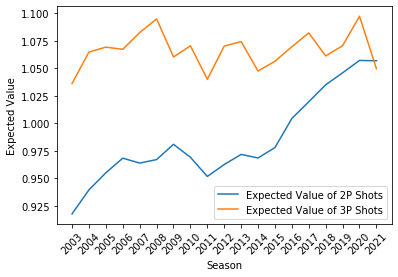

In [45]:
# Computing the Expected Values of 3 Points and 2 Points

Field_Goals_per_Season["FG2M"] = Field_Goals_per_Season["FGM"] - Field_Goals_per_Season["FG3M"]
Field_Goals_per_Season["FG2A"] = Field_Goals_per_Season["FGA"] - Field_Goals_per_Season["FG3A"]
Field_Goals_per_Season["2E"] = (Field_Goals_per_Season["FG2M"] / Field_Goals_per_Season["FG2A"])*2
Field_Goals_per_Season["3E"] = (Field_Goals_per_Season["FG3M"] / Field_Goals_per_Season["FG3A"])*3

# Plotting the Expected Values of 2P and 3P Shots

plt.plot(Field_Goals_per_Season.SEASON, Field_Goals_per_Season["2E"], label = "Expected Value of 2P Shots")
plt.plot(Field_Goals_per_Season.SEASON, Field_Goals_per_Season["3E"], label = "Expected Value of 3P Shots")
plt.xlabel("Season")
plt.ylabel("Expected Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [46]:
# 3 point attempt share among all field goals

Field_Goals_per_Season['FG3A Share'] = (Field_Goals_per_Season['FG3A'] / Field_Goals_per_Season['FGA'])*100 

In [47]:
Field_Goals_per_Season.describe()

,FGM,FGA,FG3M,FG3A,FTM,FTA,PTS,FG2M,FG2A,2E,3E,FG3A Share
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,101830.157895,224297.263158,21760.789474,61137.315789,49317.578947,65053.842105,274738.421053,80069.368421,163159.947368,0.984816,1.066566,27.251004
std,8237.863452,17118.321185,5941.471961,16426.177289,6016.720732,8275.256990,22801.422566,7951.452797,19674.822900,0.040227,0.016379,7.182187
min,80007.000000,179130.000000,13245.000000,38349.000000,35790.000000,46436.000000,211771.000000,60223.000000,113968.000000,0.917529,1.036142,18.748808
25%,100359.000000,218690.000000,17656.000000,49314.500000,46512.500000,61449.500000,274663.000000,78119.000000,157032.000000,0.963103,1.058350,22.196341
50%,104670.000000,229367.000000,20251.000000,56766.000000,50523.000000,66309.000000,280535.000000,83240.000000,172381.000000,0.969050,1.069237,24.447871
75%,106530.000000,236054.000000,26830.500000,75962.000000,53944.000000,71523.000000,286096.000000,85773.500000,177518.000000,1.011952,1.072430,32.786450
max,112537.000000,245389.000000,31217.000000,88248.000000,56929.000000,76488.000000,305733.000000,88149.000000,179742.000000,1.057144,1.097375,40.008001


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

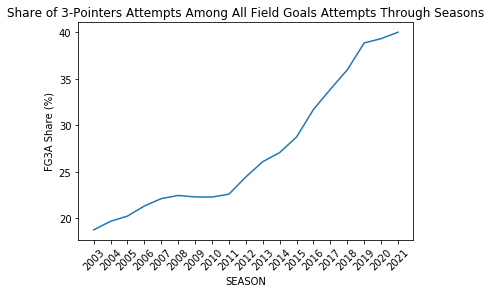

In [48]:
# Share of 3  points attempts through seasons

p = sns.lineplot(data=Field_Goals_per_Season, x="SEASON", y="FG3A Share")
p.set_title("Share of 3-Pointers Attempts Among All Field Goals Attempts Through Seasons")
p.set_ylabel("FG3A Share (%)")
plt.xticks(rotation=45)

In [49]:
# Shares of Points by Shot Type Among All Points

Field_Goals_per_Season['FG3 Share'] = (Field_Goals_per_Season['FG3M'] * 3) / Field_Goals_per_Season['PTS']
Field_Goals_per_Season['FT Share'] = (Field_Goals_per_Season['FTM']) / Field_Goals_per_Season['PTS']
Field_Goals_per_Season['FG2 Share'] = 1-Field_Goals_per_Season['FG3 Share']-Field_Goals_per_Season['FT Share']
Field_Goals_per_Season

,SEASON,FGM,FGA,FG3M,FG3A,FTM,FTA,PTS,FG2M,FG2A,2E,3E,FG3A Share,FG3 Share,FT Share,FG2 Share
0,2003,89488.0,204541.0,13245.0,38349.0,46845.0,62546.0,239066.0,76243.0,166192.0,0.917529,1.036142,18.748808,0.166209,0.195950,0.637841
1,2004,97439.0,217924.0,15219.0,42879.0,53941.0,71495.0,264030.0,82220.0,175045.0,0.939416,1.064787,19.676126,0.172924,0.204299,0.622778
2,2005,102016.0,225218.0,16241.0,45568.0,56929.0,76488.0,277205.0,85775.0,179650.0,0.954912,1.069237,20.232841,0.175765,0.205368,0.618867
3,2006,102854.0,225184.0,17082.0,48015.0,56451.0,75260.0,279241.0,85772.0,177169.0,0.968251,1.067291,21.322563,0.183519,0.202159,0.614322
4,2007,104176.0,228901.0,18263.0,50614.0,53920.0,71551.0,280535.0,85913.0,178287.0,0.963761,1.082487,22.111743,0.195302,0.192204,0.612494
5,2008,104791.0,229367.0,18797.0,51500.0,54948.0,71706.0,283327.0,85994.0,177867.0,0.966947,1.094971,22.453099,0.199032,0.193938,0.607030
6,2009,106379.0,231322.0,18230.0,51580.0,54382.0,71852.0,285370.0,88149.0,179742.0,0.980839,1.060295,22.297922,0.191646,0.190567,0.617787
7,2010,104773.0,229730.0,18264.0,51186.0,53947.0,70762.0,281757.0,86509.0,178544.0,0.969050,1.070449,22.280938,0.194465,0.191466,0.614068
8,2011,80007.0,179130.0,14028.0,40464.0,37729.0,50202.0,211771.0,65979.0,138666.0,0.951625,1.040036,22.589181,0.198724,0.178159,0.623116
9,2012,104670.0,232192.0,20251.0,56766.0,48013.0,63953.0,277604.0,84419.0,175426.0,0.962446,1.070236,24.447871,0.218848,0.172955,0.608197


In [50]:
Field_Goals_Share = Field_Goals_per_Season.copy()
Field_Goals_Share = Field_Goals_Share[['SEASON','FG3 Share','FT Share','FG2 Share']]
Field_Goals_Share = Field_Goals_Share.melt('SEASON', var_name='Shot Type', value_name='Share(%)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

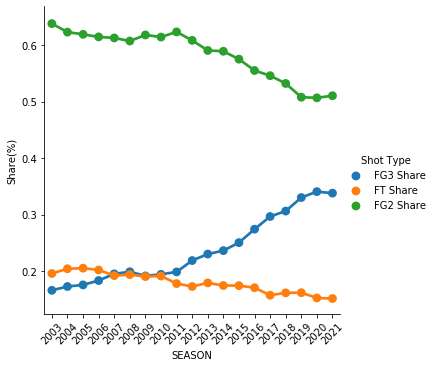

In [51]:
# Share of points attempts through seasons

sns.catplot(x="SEASON", y='Share(%)', hue = 'Shot Type',data=Field_Goals_Share,kind = 'point')
plt.xticks(rotation=45)

In [52]:
Games_Details.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [53]:
Players

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [54]:
# Player stats summary

Player_Summary = Games_Details.groupby(['PLAYER_ID','START_POSITION','GAME_ID'])['FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS'].sum().reset_index()
Player_Summary

,PLAYER_ID,START_POSITION,GAME_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,15,G,20400085,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0
1,15,G,20400104,7.0,11.0,5.0,8.0,5.0,5.0,0.0,3.0,3.0,2.0,1.0,0.0,1.0,2.0,24.0
2,15,G,20400116,5.0,6.0,3.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,13.0
3,15,G,20400125,2.0,5.0,0.0,1.0,3.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,7.0
4,15,G,20400145,1.0,4.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247089,1630678,F,22100876,9.0,11.0,0.0,0.0,0.0,1.0,3.0,6.0,9.0,0.0,0.0,1.0,1.0,3.0,18.0
247090,1630686,G,12100026,2.0,8.0,0.0,2.0,2.0,2.0,0.0,6.0,6.0,3.0,0.0,1.0,0.0,3.0,6.0
247091,1630698,G,22100527,1.0,8.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,6.0,0.0,0.0,1.0,0.0,2.0
247092,1630698,G,22100533,4.0,9.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,1.0,2.0,8.0


In [55]:
# Game statistics for different seasons

Player_Summary = pd.merge(Player_Summary,Games_with_Season,on = ['GAME_ID'])
Player_Summary

,PLAYER_ID,START_POSITION,GAME_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,SEASON
0,15,G,20400085,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2004
1,1882,F,20400085,4.0,12.0,0.0,0.0,3.0,5.0,3.0,6.0,9.0,6.0,0.0,3.0,2.0,3.0,11.0,2004
2,1894,G,20400085,6.0,14.0,0.0,1.0,11.0,13.0,1.0,5.0,6.0,4.0,1.0,0.0,2.0,1.0,23.0,2004
3,2060,G,20400085,6.0,12.0,3.0,5.0,4.0,6.0,0.0,5.0,5.0,8.0,3.0,0.0,1.0,3.0,19.0,2004
4,2199,F,20400085,6.0,7.0,0.0,0.0,5.0,8.0,3.0,10.0,13.0,0.0,0.0,2.0,1.0,3.0,17.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247089,1629652,F,22100695,3.0,10.0,2.0,7.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,4.0,10.0,2021
247090,1630171,G,22100695,3.0,6.0,0.0,3.0,2.0,2.0,1.0,4.0,5.0,1.0,3.0,1.0,5.0,4.0,8.0,2021
247091,1630526,C,22100695,1.0,9.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,1.0,1.0,0.0,2.0,3.0,2.0,2021
247092,1630581,G,22100695,3.0,12.0,1.0,6.0,1.0,2.0,2.0,3.0,5.0,3.0,2.0,0.0,3.0,6.0,8.0,2021


In [56]:
Players_Names = Players[['PLAYER_NAME','PLAYER_ID']]
Players_Names

,PLAYER_NAME,PLAYER_ID
0,Royce O'Neale,1626220
1,Bojan Bogdanovic,202711
2,Rudy Gobert,203497
3,Donovan Mitchell,1628378
4,Mike Conley,201144
...,...,...
7223,Lanny Smith,201831
7224,Warren Carter,201999
7225,Bennet Davis,201834
7226,Brian Hamilton,201646


In [57]:
# Calculating 3 points percentage 
Player_Summary_Percent =  Player_Summary.groupby(['SEASON','PLAYER_ID'])['FG3M','FG3A'].sum().reset_index()
Player_Summary_Percent["3P(%)"] = (Player_Summary_Percent["FG3M"] / Player_Summary_Percent["FG3A"]) * 100 
Player_Summary_Percent.sort_values(by = "FG3M", ascending = False)

,SEASON,PLAYER_ID,FG3M,FG3A,3P(%)
4440,2015,201939,497.0,1111.0,44.734473
5583,2018,201939,460.0,1081.0,42.553191
5580,2018,201935,440.0,1202.0,36.605657
4813,2016,201939,420.0,1016.0,41.338583
4053,2014,201939,402.0,913.0,44.030668
...,...,...,...,...,...
5779,2018,1627734,0.0,2.0,0.000000
5777,2018,1627732,0.0,6.0,0.000000
3000,2011,201189,0.0,0.0,NaN
5775,2018,1627215,0.0,2.0,0.000000


In [58]:
# Calculating the Average of 3 Points Attempt per Game for Each Player in Different Seasons
Seasonal_Player_Summary = Player_Summary.groupby(['SEASON','PLAYER_ID'])['FG3A'].mean().reset_index()
Seasonal_Player_Summary

,SEASON,PLAYER_ID,FG3A
0,2003,43,2.600000
1,2003,56,2.125000
2,2003,57,1.861702
3,2003,72,0.064516
4,2003,77,0.636364
...,...,...,...
7185,2021,1630625,5.000000
7186,2021,1630631,2.000000
7187,2021,1630678,1.000000
7188,2021,1630686,2.000000


In [59]:
# Adding FG3A,

Seasonal_Player_Summary = pd.merge(Seasonal_Player_Summary,Player_Summary_Percent, on = ['SEASON','PLAYER_ID'])
Seasonal_Player_Summary = pd.merge(Seasonal_Player_Summary,Players_Names, on = ['PLAYER_ID'])
Seasonal_Player_Summary['SEASON'] = Seasonal_Player_Summary.SEASON.astype(str)
Seasonal_Player_Summary ["Player with Season"] = Seasonal_Player_Summary["PLAYER_NAME"] + " - " + Seasonal_Player_Summary["SEASON"]
Seasonal_Player_Summary = Seasonal_Player_Summary.drop_duplicates()
Seasonal_Player_Summary.rename(columns={"FG3A_x": "FG3A", "FG3M": "FG3M_Season", "FG3A_y": "FG3A_Season"},inplace = True)

In [60]:
Seasonal_Player_Summary.describe()

,PLAYER_ID,FG3A,FG3M_Season,FG3A_Season,3P(%)
count,6.461000e+03,6461.000000,6461.000000,6461.000000,5545.000000
mean,3.711702e+05,2.687796,37.604705,103.761028,30.997463
std,5.706793e+05,2.276235,56.668353,149.445471,16.091771
min,2.550000e+02,0.000000,0.000000,0.000000,0.000000
25%,2.581000e+03,0.314286,1.000000,3.000000,25.000000
50%,2.015780e+05,2.620690,9.000000,29.000000,33.644860
75%,2.034760e+05,4.256098,55.000000,154.000000,38.908451
max,1.629833e+06,15.000000,497.000000,1202.000000,100.000000


In [61]:
# Take the players at least 550 shots during the season and get the 20 players with the highest percentage
Seasonal_Player_Summary = Seasonal_Player_Summary[Seasonal_Player_Summary["FG3A_Season"] > 550]
Seasonal_Player_Summary.nlargest(20,'3P(%)')


,SEASON,PLAYER_ID,FG3A,FG3M_Season,FG3A_Season,3P(%),PLAYER_NAME,Player with Season
10278,2014,2594,6.326316,278.0,601.0,46.256240,Kyle Korver,Kyle Korver - 2014
740,2007,978,6.460674,259.0,575.0,45.043478,Peja Stojakovic,Peja Stojakovic - 2007
26354,2015,201939,10.892157,497.0,1111.0,44.734473,Stephen Curry,Stephen Curry - 2015
26321,2012,201939,7.844444,314.0,706.0,44.475921,Stephen Curry,Stephen Curry - 2012
26343,2014,201939,8.453704,402.0,913.0,44.030668,Stephen Curry,Stephen Curry - 2014
33645,2017,202691,7.122449,307.0,698.0,43.982808,Klay Thompson,Klay Thompson - 2017
46022,2019,1629130,8.239583,343.0,791.0,43.362832,Duncan Robinson,Duncan Robinson - 2019
33618,2014,202691,7.000000,318.0,735.0,43.265306,Klay Thompson,Klay Thompson - 2014
32325,2018,201980,5.339623,244.0,566.0,43.109541,Danny Green,Danny Green - 2018
21356,2014,200755,5.777778,245.0,572.0,42.832168,JJ Redick,JJ Redick - 2014


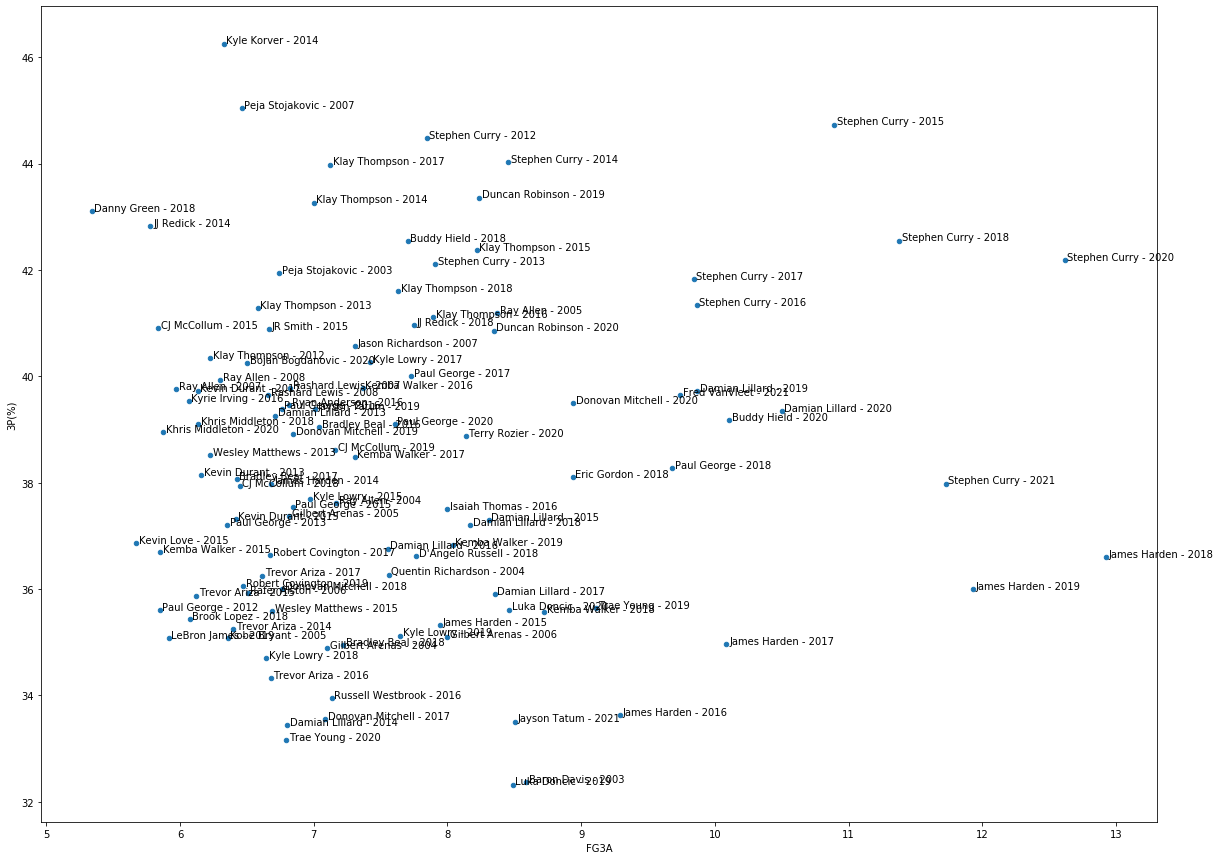

In [62]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

ax = Seasonal_Player_Summary.plot.scatter('FG3A', '3P(%)', figsize=(20,15))
label_point(Seasonal_Player_Summary['FG3A'], Seasonal_Player_Summary['3P(%)'], Seasonal_Player_Summary['Player with Season'], ax)

In [63]:
Seasonal_Player_Summary

,SEASON,PLAYER_ID,FG3A,FG3M_Season,FG3A_Season,3P(%),PLAYER_NAME,Player with Season
422,2004,951,7.168539,240.0,638.0,37.617555,Ray Allen,Ray Allen - 2004
427,2005,951,8.371795,269.0,653.0,41.194487,Ray Allen,Ray Allen - 2005
437,2007,951,5.969697,235.0,591.0,39.763113,Ray Allen,Ray Allen - 2007
442,2008,951,6.301075,234.0,586.0,39.931741,Ray Allen,Ray Allen - 2008
647,2005,977,6.356322,194.0,553.0,35.081374,Kobe Bryant,Kobe Bryant - 2005
...,...,...,...,...,...,...,...,...
45961,2020,1629027,6.795181,187.0,564.0,33.156028,Trae Young,Trae Young - 2020
45975,2019,1629029,8.486486,203.0,628.0,32.324841,Luka Doncic,Luka Doncic - 2019
45977,2020,1629029,8.460526,229.0,643.0,35.614308,Luka Doncic,Luka Doncic - 2020
46022,2019,1629130,8.239583,343.0,791.0,43.362832,Duncan Robinson,Duncan Robinson - 2019


In [64]:
# Calculating the stats for different positions in different seasons

Positional_Player_Summary = Player_Summary.groupby(['START_POSITION','SEASON'])['FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS'].sum().reset_index()
Positional_Player_Summary['FG3A Share'] = (Positional_Player_Summary['FG3A'] / Positional_Player_Summary['FGA']) * 100

Text(32.153055555555554, 0.5, '3-Pointers Attempt Share (%)')

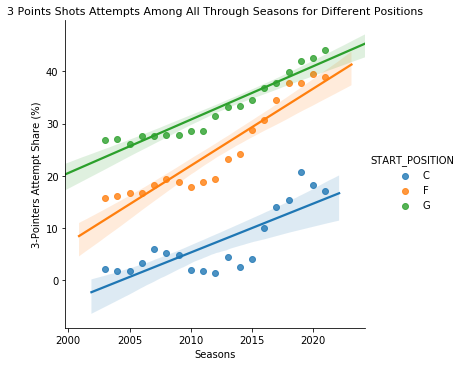

In [65]:
# Plot of 3 Points Shots Attempts Among All Through Seasons for Different Positions

sns.lmplot(x= "SEASON", y = "FG3A Share", hue = "START_POSITION" , data = Positional_Player_Summary)
plt.title("3 Points Shots Attempts Among All Through Seasons for Different Positions",fontsize=11)
plt.xlabel("Seasons")
plt.ylabel("3-Pointers Attempt Share (%)")